<a href="https://colab.research.google.com/github/sfhelmet/Vaccination-Analysis/blob/main/Vaccination_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



```
# This is formatted as code
```

#Stats ESP



In [ ]:
from google.colab import drive
drive.mount('/content/drive/')


Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


We had to customize our data sets by dropping some rows that were not analyzing the test performed. We then went on to take the sum of all the tests done in every country. Afterward, renamed our column "Entity" to "Country" so that we can then merge the new covid data set with the GDP data set. We did this by using the .merge pandas function.



In [ ]:
import io
#Is there a relation between the number of Covid19 tests performed in a country and the GPD of that country?
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

df_tests_covid=pd.read_csv('/content/drive/MyDrive/Dataset/full-list-daily-covid-19-tests-per-thousand_2 (1).csv')
df_GDP=pd.read_csv('/content/drive/MyDrive/Dataset/GDP_per_capita (1).csv')

In [ ]:
#DROPPING ALL ROWS WHERE THERE IS NOT 'tests performed' UNDER THE COLUMN '142602-annotations'
df=df_tests_covid.drop(df_tests_covid.index[df_tests_covid['142606-annotations'] != 'tests performed'], inplace = False)
df_covid = df.reset_index(drop=True)


#SUMMING ALL 'new_tests' per country
df_covid_real=df_covid.groupby(by='Entity')['new_tests_per_thousand'].sum().to_frame().reset_index()

#RENAME COLUMN ENTITY TO COUNTRY
df_covid_final=df_covid_real.rename(columns={"Entity" : "Country"})


#MERGING OUR 2 DF (df_GDP AND df_covid_real) ACCORDING TO COLUMN "Country"
df_merged = df_GDP.merge(df_covid_final, how = 'inner', on = ['Country'])

#RENAMING "new_tests_per_thousand" TO "tests_per_thousand"
df_merged_final=df_merged.rename(columns={"new_tests_per_thousand" : "tests_per_thousand"})

#KNOWING HOW MANY COUNTRIES WE HAVE IN COMMON BETWEEN THE 2 DATA SETS
print(len(df_merged_final), "countries in common")


67 countries in common


In the above code, once these new data sets were merged it was now time to see the number of countries that both data sets had in common. We did this to ensure that our graph was not sabotaged by analyzing countries that both data sets did not have in common. By doing this we found that we had 67 countries in common that we would be able to analyze. Even though we may have lost numerous countries, 67 countries were still a large enough sample size to see a correlation between our two data sets.

Following this we made three lists, each of them corresponding to 'country', 'test performed', and 'GDP per capita' 

In [ ]:
#  #MAKING LISTS FOR 3 COLUMNS IN df

# list_iso = df_merged_final['ISO-code'].to_list()

# list_country = df_merged_final['Country'].to_list()

# list_test = np.divide(df_merged_final['tests_per_thousand'].to_list(),1)

# list_GDP_thousands = np.divide(df_merged_final['GDP per capita'].tolist(),1000)

##Setting the data up


In the code below we are sorting through the pre-existing data and setting a parameter to be able to organise the countries in 3 categories: Least developed countries (TWC), poorer countries, countries and wealthy countries. To do this, we used a baseline GDP per capita each country needs to have to consider themselves to be a wealthy country. The baseline that we are using for the GDP per capita is 20,000 USD. With the exception of already found least developed countries, if the country did not receive that GDP per capita, then they will fall into the less wealthy country category. Following this we are creating a new list for third world countries and non third world countries. To ensure our methods we used were accurate, we cross referenced our data with a dataset of the least developed countries and found similarities in them.

In the part below, we try to make a data frame containing GDP and number of new tests of all 67 the countries except the ones in the new CSV file (list of least developed/third world countries). To do this we take the final data frame from the previous part (df_merged_final) containing 67 different countries. With this data frame, we drop all rows where the countries correspond to the countries of data frame of the new CSV. We will call this diminished data frame: df_without_third. With this new data frame, we can put every column into a list. We then get 4 different lists representing: the ISO code of the countries, the names of the countries, the number of tests per 1000 people and the GDP per capita. These lists are going to come in handy when it comes to plotting the scatter plot.

In [ ]:
#TWC (LEAST DEVELOPED COUNTRY) DATAFRAME
df_third_world=pd.read_csv('/content/drive/MyDrive/Dataset/list_of_least_developed_countries_as_of_december_2018_uo7hWUb_1.csv', encoding ='latin1')

#FIND THIRD WORLD COUNTRIES (from 'list_of_least_developed_countries_as_of_december_2018_uo7hWUb.csv')
df_third= df_third_world.rename(columns={"Country name" : "Country"})
df_merged3 = df_merged_final.merge(df_third, how = 'inner', on = ['Country'])
list_third_world=df_merged3['Country'].tolist()

#DF WITHOUT TWC (third world countries)
df_without_third= df_merged_final[~df_merged_final['Country'].isin(list_third_world)]


#GETTIGN LISTS FROM DF WITHOUT TWC
list_iso3=df_without_third['ISO-code'].to_list()
list_country3=df_without_third['Country'].to_list()
list_test3=df_without_third['tests_per_thousand'].to_list()
list_GDP_thousands3=df_without_third['GDP per capita'].to_list()




We repeat the same process but this time with just the least developed countries (TWC).

In [ ]:
#DF JUST TWC
df_just_third= df_merged_final[~df_merged_final['Country'].isin(list_country3)]


#GETTING LISTS OF JUST TWC
list_iso_just3 = df_just_third['ISO-code'].to_list()
list_country_just3 = df_just_third['Country'].to_list()
list_test_just3 = df_just_third['tests_per_thousand'].to_list()
list_GDP_thousands_just3 = df_just_third['GDP per capita'].to_list()




Then again for all countries under 20 000 USD in GDP per capita and that are not countries from the data frame right above (df_just_third.)

In [ ]:
#GETIING DF COUNTRIES UNDER 20 000 and not TWC
#dropping all rows where 'GDP per capita'>= 2000
df_lesswealthy=df_merged_final.drop(df_merged_final.index[df_merged_final['GDP per capita'] >= 20000], inplace = False)
df_lesswealthy = df_lesswealthy.reset_index(drop=True)

df_lesswealthy= df_lesswealthy[~df_lesswealthy['Country'].isin(list_country_just3)]

list_iso_lesswealthy = df_lesswealthy['ISO-code'].to_list()
list_country_lesswealthy = df_lesswealthy['Country'].to_list()
list_test_lesswealthy = df_lesswealthy['tests_per_thousand'].to_list()
list_GDP_thousands_lesswealthy = df_lesswealthy['GDP per capita'].to_list()


And finally, we do the same thing for countries that are over 20 000 USD in GDP per capita. We will refer to those countries and their data by wealthy countries.

In [ ]:
#DF of countries with GDP over 20 000$ per capita (wealthy)
df_wealthy= df_merged_final[~df_merged_final['Country'].isin(list_country_just3)]
df_wealthy=df_wealthy[~df_wealthy['Country'].isin(list_country_lesswealthy)]

#getting list from df_wealthy
list_iso_wealthy = df_wealthy['ISO-code'].to_list()
list_country_wealthy = df_wealthy['Country'].to_list()
list_test_wealthy = df_wealthy['tests_per_thousand'].to_list()
list_GDP_thousands_wealthy = df_wealthy['GDP per capita'].to_list()

Now that we have all the lists for the least developed countries, for the countries under 20 000 USD in GDP per capita and for the wealthy countries, we can now plot our datas.

##Graphing The Data

The following section is how we graphed all of our data. We used the matplotlib library to generate the appropriate pieces of information on our graph. For our graph, we decided that the best type of plot would be a scatter plot. The scatter plot will have green, red and orange dots indicating the economic class that the country will be found in.

We will plot 4 plots in total. One for each "economic class" and then a final plot with all the data combined.


### Figure 1. Covid Test per Thousands vs. GDP per Capita (least developped countries)

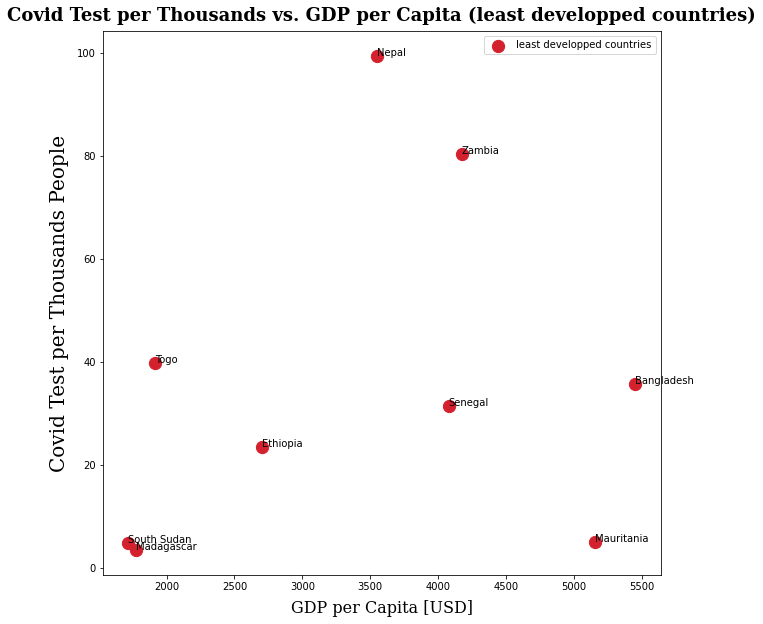

In [ ]:
fig, ax = plt.subplots()


#setting size of dots
s=150
#plotting 9 least developped countries (aka TWC)
a,b = (list_GDP_thousands_just3,list_test_just3)
o=list_country_just3
for i, txt in enumerate(o):
    ax.annotate(txt, (a[i], b[i]))
scatter = ax.scatter(a, b, c='#D3212D', s=s)

plt.title("Covid Test per Thousands vs. GDP per Capita (least developped countries)",
    fontdict ={
        'family': 'serif',
        'color':  'xkcd:black',
        'weight': 'bold',
        'size': 18,
    },
    loc='Center',
    pad=10)
plt.gcf().set_size_inches((10, 10)) 

plt.xlabel("GDP per Capita [USD]",
    fontdict ={
        'family': 'serif',
        'color':  'xkcd:black',
        'weight': 'normal',
        'size': 16,
    },
    labelpad=8)

plt.ylabel("Covid Test per Thousands People",
    fontdict ={
        'family': 'serif',
        'color':  'xkcd:black',
        'weight': 'normal',
        'size': 16,
    },
    labelpad=8)
plt.legend(['least developped countries','countries with GDP smaller then 20000','least developed countries (TWC)'])
axes = plt.gca()

axes.yaxis.label.set_size(20)
plt.show()

### Figure 2. Covid Test per Thousands vs. GDP per Capita (GDP under 20 000)

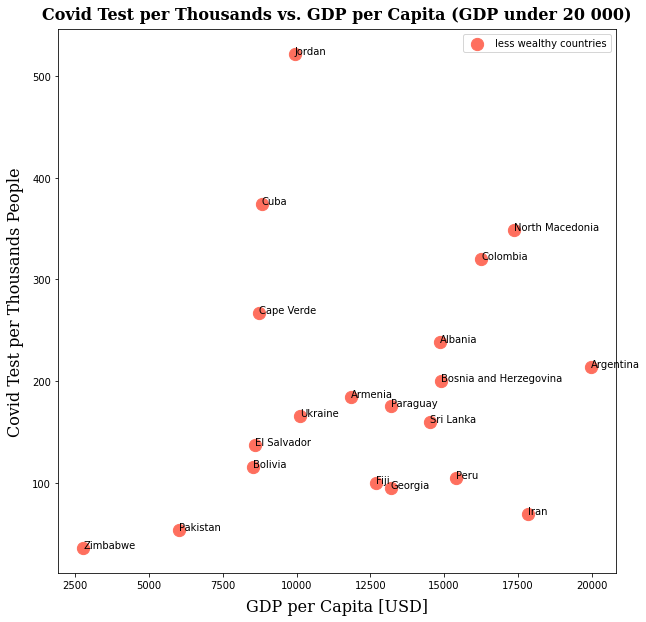

In [ ]:
fig, ax = plt.subplots()


#setting size of dots
s=150
#plotting countries under 20 000 GDP per capita
c,d = (list_GDP_thousands_lesswealthy,list_test_lesswealthy)
p=list_country_lesswealthy
for i, txt in enumerate(p):
    ax.annotate(txt, (c[i], d[i]))
scatter = ax.scatter(c, d, c='#FE6F5E', s=s)

plt.title("Covid Test per Thousands vs. GDP per Capita (GDP under 20 000)",
    fontdict ={
        'family': 'serif',
        'color':  'xkcd:black',
        'weight': 'bold',
        'size': 16,
    },
    loc='Center',
    pad=10)
plt.gcf().set_size_inches((10, 10)) 

plt.xlabel("GDP per Capita [USD]",
    fontdict ={
        'family': 'serif',
        'color':  'xkcd:black',
        'weight': 'normal',
        'size': 16,
    },
    labelpad=8)

plt.ylabel("Covid Test per Thousands People",
    fontdict ={
        'family': 'serif',
        'color':  'xkcd:black',
        'weight': 'normal',
        'size': 16,
    },
    labelpad=8)
plt.legend(['less wealthy countries','countries with GDP smaller then 20000','least developed countries (TWC)'])
axes = plt.gca()
plt.show()

### Figure 3. Covid Test per Thousands vs. GDP per Capita (wealthy countries)

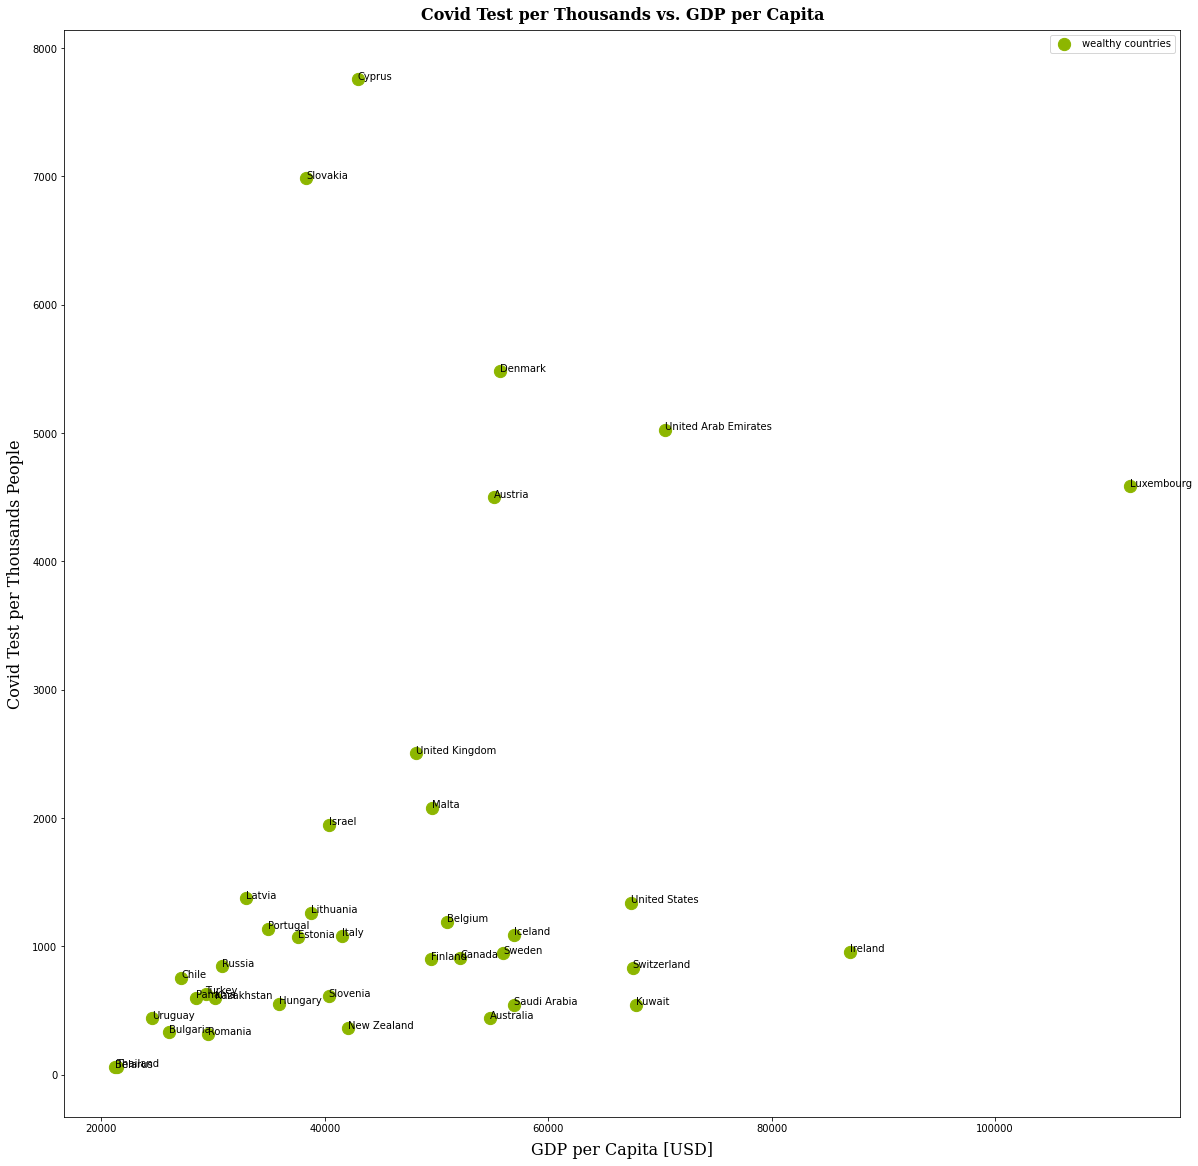

In [ ]:
fig, ax = plt.subplots()


#setting size of dots
s=150
#plotting wealthier countries
x,y = (list_GDP_thousands_wealthy,list_test_wealthy)
n= list_country_wealthy
for i, txt in enumerate(n):
    ax.annotate(txt, (x[i], y[i]))
scatter = ax.scatter(x, y, c='#8DB600', s=s)

plt.title("Covid Test per Thousands vs. GDP per Capita",
    fontdict ={
        'family': 'serif',
        'color':  'xkcd:black',
        'weight': 'bold',
        'size': 16,
    },
    loc='Center',
    pad=10)
plt.gcf().set_size_inches((20, 20)) 

plt.xlabel("GDP per Capita [USD]",
    fontdict ={
        'family': 'serif',
        'color':  'xkcd:black',
        'weight': 'normal',
        'size': 16,
    },
    labelpad=8)

plt.ylabel("Covid Test per Thousands People",
    fontdict ={
        'family': 'serif',
        'color':  'xkcd:black',
        'weight': 'normal',
        'size': 16,
    },
    labelpad=8)
plt.legend(['wealthy countries','countries with GDP smaller then 20000','least developed countries (TWC)'])
axes = plt.gca()

plt.show()

In figure 3, at first we were confused on how a country could have more than 1000 tests per thousand people, although, this could be explained as some people get more than one test. This would explain why some countries have more than 1000 tests.

### Figure 4. Covid Test per Thousands vs. GDP per Capita (all data)

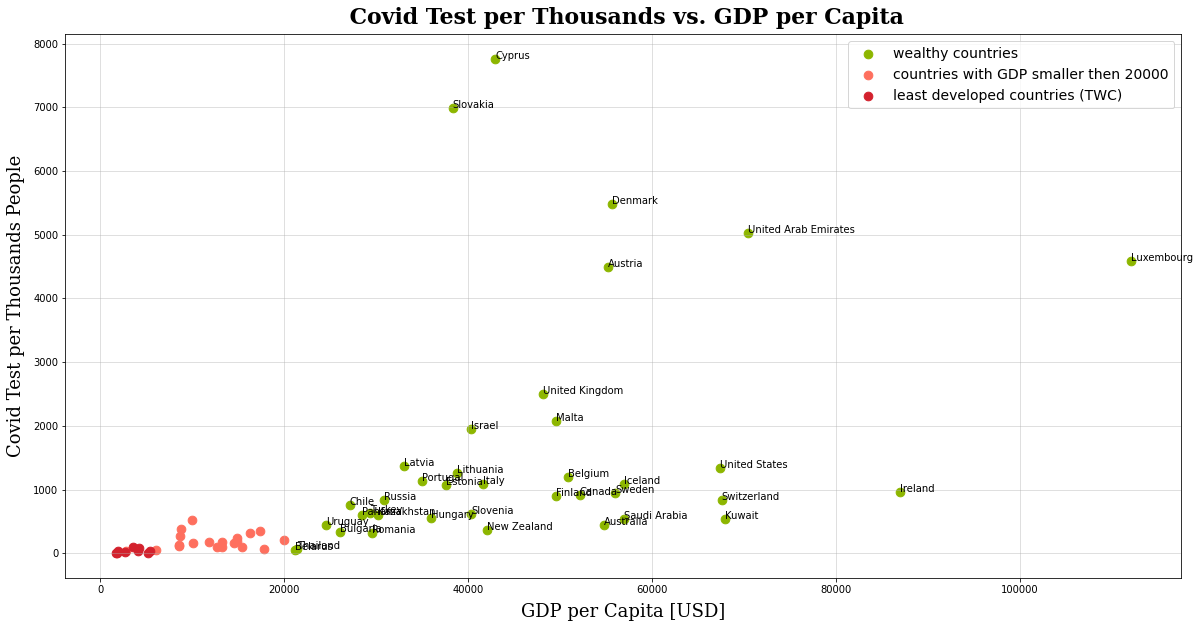

In [ ]:
#USING MATPLOTLIB, CREATING GRAPH FOR THE DATA FOUND 
# we didnt want to add the name of all countries, it would've been to clustered
fig, ax = plt.subplots()


#setting size of dots
s=75

#plotting wealthier countries
x,y = (list_GDP_thousands_wealthy,list_test_wealthy)
n= list_country_wealthy
for i, txt in enumerate(n):
    ax.annotate(txt, (x[i], y[i]))
scatter = ax.scatter(x, y, c='#8DB600', s=s)

#plotting countries under 20 000 GDP per capita
c,d = (list_GDP_thousands_lesswealthy,list_test_lesswealthy)
# p=list_country_lesswealthy
# for i, txt in enumerate(p):
#     ax.annotate(txt, (c[i], d[i]))
scatter = ax.scatter(c, d, c='#FE6F5E', s=s)

#plotting 9 least developped countries (aka TWC)
a,b = (list_GDP_thousands_just3,list_test_just3)
# o=list_country_just3
# for i, txt in enumerate(o):
#     ax.annotate(txt, (a[i], b[i]))
scatter = ax.scatter(a, b, c='#D3212D', s=s)



#Customizing
plt.title(" Covid Test per Thousands vs. GDP per Capita",
    fontdict ={
        'family': 'serif',
        'color':  'xkcd:black',
        'weight': 'bold',
        'size': 22,
    },
    loc='Center',
    pad=10)
plt.gcf().set_size_inches((20, 10)) 

plt.xlabel("GDP per Capita [USD]",
    fontdict ={
        'family': 'serif',
        'color':  'xkcd:black',
        'weight': 'normal',
        'size': 18,
    },
    labelpad=8)

plt.ylabel("Covid Test per Thousands People",
    fontdict ={
        'family': 'serif',
        'color':  'xkcd:black',
        'weight': 'normal',
        'size': 18,
    },
    labelpad=8)

plt.legend(['wealthy countries','countries with GDP smaller then 20000','least developed countries (TWC)'], prop={'size': 14})
plt.grid(True, axis='both', alpha=0.5)

plt.show()